# Taller Interactivo: Árboles de Decisión y Evaluación de Modelos

## Caso de Estudio: Social_Network_Ads

Este taller profesional se centra en la construcción, interpretación y evaluación de un modelo de Árbol de Decisión utilizando el dataset _Social_Network_Ads_. Se evaluarán aspectos técnicos y se comparará el desempeño con un modelo de Regresión Logística, analizando métricas de evaluación y posibles indicadores de sobreajuste.

## 2. Objetivos del Taller

En este taller se pretende:
- Comprender los fundamentos teóricos de los árboles de decisión.
- Realizar un análisis exploratorio y revisión de datos.
- Aplicar la estratificación en el particionado de datos.
- Entrenar y evaluar un modelo de Árbol de Decisión.
- Visualizar y analizar la matriz de confusión y la curva ROC.
- Ajustar el modelo para controlar la complejidad y el sobreajuste.
- Promover el análisis crítico de los resultados obtenidos.

## 3. Carga del Dataset y Primer Análisis

En esta sección se carga el dataset _Social_Network_Ads_ desde una URL y se visualizan las primeras filas y la información general. Esto permitirá conocer la estructura de los datos y los tipos de variables presentes.

In [8]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv

--2025-10-24 21:05:59--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2025-10-24 21:06:00 (23.2 MB/s) - ‘Social_Network_Ads.csv’ saved [10926/10926]



In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


from imblearn.over_sampling import SMOTE

In [10]:
df = pd.read_csv('Social_Network_Ads.csv')


In [11]:
# Mostrar las primeras filas
print(df.head(10))

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0


In [12]:
# Información general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [13]:
# Descripción estadística
print(df.describe())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


## 4. Revisión de Variables y Tipos de Datos

Examina las variables del dataset y discute brevemente el significado de cada una. Reflexiona sobre la relevancia de cada variable para el análisis y el modelado.

In [14]:
data_types = df.dtypes
print(data_types)

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


## 5. Visualización de la Distribución de la Variable Objetivo

Visualiza la distribución de la variable `Purchased` usando un gráfico de barras. Esto permitirá identificar si existe un balance entre las clases.

**Pregunta para el grupo:**
- ¿La variable `Purchased` se encuentra balanceada? ¿Qué implicaciones podría tener un desequilibrio en la modelación?

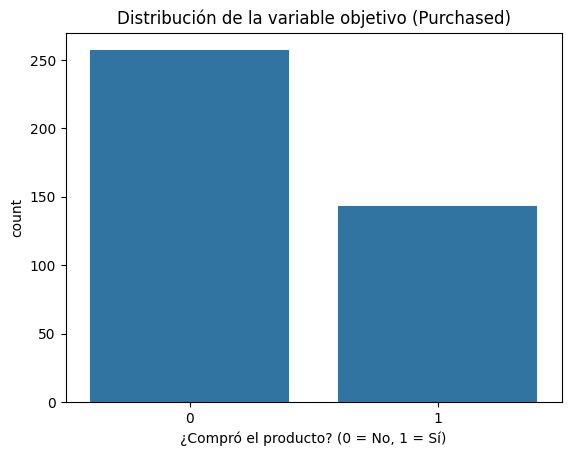

In [15]:
sns.countplot(x='Purchased', data=df)
plt.title('Distribución de la variable objetivo (Purchased)')
plt.xlabel('¿Compró el producto? (0 = No, 1 = Sí)')
plt.show()

**Respuesta:** Este desequilibrio puede afectar el modelo, haciendo que aprenda a predecir con mayor precisión la clase mayoritaria (no compra) y tenga menor capacidad para identificar correctamente los casos de compra.

## 6. Análisis de la Distribución y Reflexión

Discute la distribución observada. Reflexiona sobre cómo un posible desbalance podría afectar la performance del modelo y qué estrategias se podrían utilizar para mitigarlo (por ejemplo, SMOTE en otros casos).

**Respuesta:** La distribución de la variable Purchased muestra un leve desbalance entre las clases: hay más usuarios que no compraron el producto (0) que los que sí (1).
Este desequilibrio puede afectar el rendimiento del modelo, ya que podría aprender a predecir con mayor precisión la clase mayoritaria, reduciendo su capacidad para identificar correctamente los casos positivos (usuarios que compran).
Para mitigar este problema se pueden aplicar estrategias como:

- Estratificación al dividir los datos en entrenamiento y prueba, garantizando que ambas clases estén representadas.

- Ajuste de pesos de clase en el modelo para penalizar los errores en la clase minoritaria.

- Técnicas de sobremuestreo o submuestreo (por ejemplo, SMOTE), que permiten equilibrar las proporciones entre clases.

## 7. Selección de Variables para el Modelo

Para este taller, se utilizarán las variables `Age` y `EstimatedSalary` como características para predecir `Purchased`.

**Pregunta:**
- ¿Por qué considerarían estas dos variables relevantes para predecir la compra?

In [16]:
# selección de variables
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

**Respuesta** La edad puede reflejar diferencias en intereses, poder adquisitivo o hábitos de compra, mientras que el salario estimado representa la capacidad económica del usuario, lo cual puede influir en la probabilidad de adquirir el producto.

## 8. División de Datos: Entrenamiento y Prueba

Se dividirá el dataset en un 75% para entrenamiento y un 25% para prueba, aplicando estratificación para mantener la proporción de clases.

**Pregunta:**
- ¿Qué ventajas ofrece la estratificación al dividir el dataset?

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("Tamaño del conjunto de entrenamiento:",X_train.shape)
print("Tamaño del conjunto de prueba:",X_test.shape)


Tamaño del conjunto de entrenamiento: (280, 2)
Tamaño del conjunto de prueba: (120, 2)


**Respuesta** La estratificación garantiza que la proporción de clases de la variable objetivo (Purchased) se mantenga igual en los conjuntos de entrenamiento y prueba.

## 9. Entrenamiento Inicial del Modelo de Árbol de Decisión

Se entrenará un modelo de Árbol de Decisión sin restricciones de profundidad utilizando el conjunto de entrenamiento.

**Pregunta:**
- ¿Qué implica entrenar un modelo sin restricciones de profundidad en términos de complejidad y riesgo de sobreajuste?

In [21]:


# Entrenamiento sin restricción de profundidad
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

## 10. Evaluación del Modelo: Análisis de Métricas

Analizaremos las métricas de evaluación obtenidas (exactitud, precisión, recall, F1-Score) y la matriz de confusión.

**Pregunta:**
- ¿Qué información específica nos aporta la matriz de confusión respecto a los errores del modelo?

In [31]:
y_pred = tree_model.predict(X_test)

# 2. Métricas de evaluación
print("Exactitud:", accuracy_score(y_test, y_pred))
print("Precisión:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))



Exactitud: 0.8833333333333333
Precisión: 0.8222222222222222
Recall: 0.8604651162790697
F1-Score: 0.8409090909090909


Matriz de confusión:
[[69  8]
 [ 6 37]]


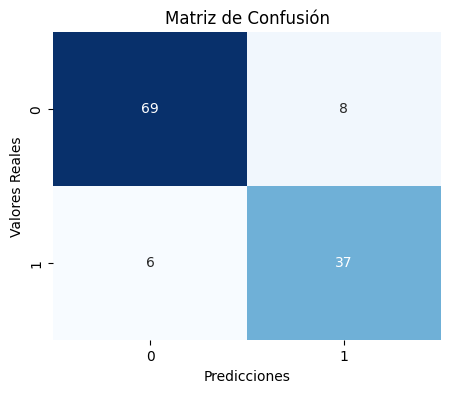

In [32]:
# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

## 11. Visualización de la Curva ROC y Cálculo del AUC

Genera la curva ROC y calcula el AUC para evaluar la capacidad discriminativa del modelo.

**Pregunta:**
- ¿Cómo interpretan la curva ROC y qué indica un valor de AUC alto o bajo?

In [37]:
fpr, tpr, thresholds = roc_curve ( y_test, y_pred)
auc_score = auc(fpr, tpr)


In [38]:
print("AUC:", auc_score)

AUC: 0.8782845061914829


Text(0, 0.5, 'Tasa de verdaderos positivos')

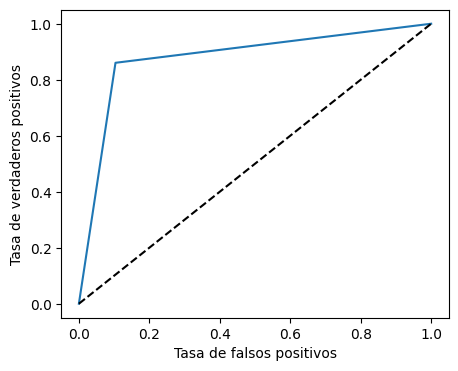

In [41]:
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')

## 12. Visualización e Interpretación del Árbol de Decisión

Exporta y visualiza el árbol de decisión utilizando GraphViz y pydotplus. Analiza la estructura, las reglas y la importancia de cada nodo.

**Preguntas:**
- ¿Cuál es la regla de decisión en el primer nodo?
- ¿Cómo se interpretan las ramas y las hojas en relación a las variables `Age` y `EstimatedSalary`?
- ¿Qué partes del árbol podrían estar contribuyendo al sobreajuste?

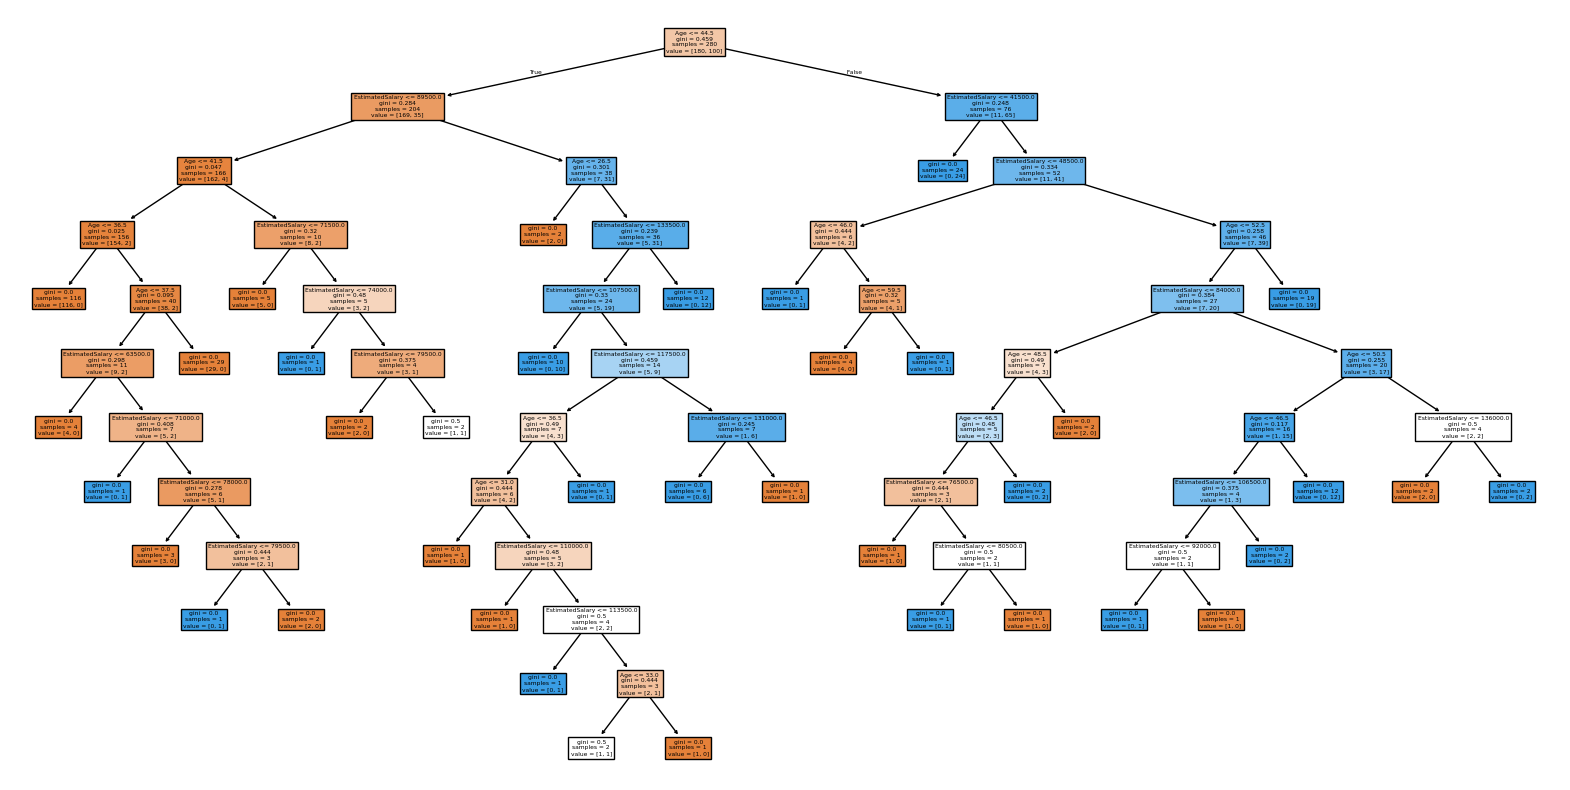

In [42]:
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns)
plt.show()

## 13. Análisis Crítico del Modelo Inicial

Revisa los resultados obtenidos en el modelo sin restricciones y discute:
- ¿Existen indicios de sobreajuste? ¿Cómo se comparan las métricas entre entrenamiento y prueba?
- ¿Qué mejoras se podrían implementar para optimizar la generalización del modelo?

El árbol de decisión generado muestra un modelo con gran profundidad y varias ramas. Esto indica que el modelo se ajustó completamente a los datos de entrenamiento, lo cual puede generar sobreajuste. A pesar de que logra clasificar correctamente los ejemplos vistos, podría no tener el mismo desempeño con datos nuevos.

## 14. Ajuste del Modelo: Control de la Profundidad

Entrena un segundo modelo de Árbol de Decisión limitando la profundidad (por ejemplo, `max_depth=5`) y evalúa su desempeño.

**Pregunta:**
- ¿Qué cambios se observan en las métricas al limitar la profundidad del árbol? ¿Cómo afecta esto a la capacidad del modelo de generalizar?

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Modelo con profundidad limitada
tree_model_limited = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model_limited.fit(X_train, y_train)

# Predicciones
y_pred_limited = tree_model_limited.predict(X_test)

In [45]:
print("=== Reporte del modelo limitado ===")
print(classification_report(y_test, y_pred_limited))

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_limited))

=== Reporte del modelo limitado ===
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        77
           1       0.86      0.84      0.85        43

    accuracy                           0.89       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.89      0.89      0.89       120

Matriz de confusión:
[[71  6]
 [ 7 36]]


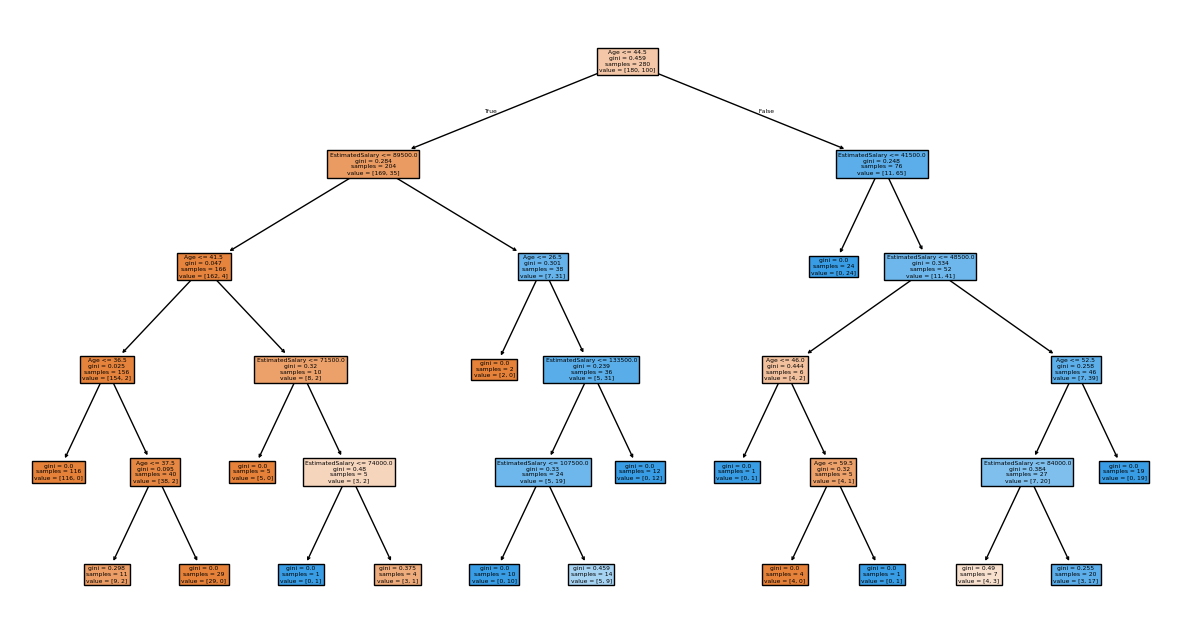

In [46]:
plt.figure(figsize=(15,8))
plot_tree(tree_model_limited, filled=True, feature_names=X.columns)
plt.show()

Al limitar la profundidad del árbol a 5 niveles, se observa una disminución ligera en las métricas de desempeño, alcanzando una exactitud del 89 %, una precisión promedio de 0.89 y un F1-score de 0.88.
Visualmente, el árbol es menos profundo y más comprensible, facilitando su interpretación. Este control de la profundidad evita que el modelo aprenda ruido o patrones demasiado específicos del conjunto de entrenamiento.

## 15. Discusión Final y Comparación de Modelos

Analiza y compara los resultados obtenidos del modelo inicial y el modelo ajustado. Reflexiona sobre los siguientes aspectos:
- ¿Cuál de los dos modelos ofrece un mejor balance entre complejidad e interpretabilidad?
- ¿Qué indicios sugieren un mejor comportamiento frente al sobreajuste?
- ¿Qué otros modelos (por ejemplo, Regresión Logística) podrían utilizarse como referencia para evaluar el desempeño?

Utiliza estos puntos para guiar una discusión profesional y técnica entre los participantes.

Al comparar el modelo inicial con el modelo ajustado (con profundidad limitada), se observa que el modelo sin restricciones obtuvo métricas más altas en el conjunto de entrenamiento, pero probablemente una menor capacidad de generalización al enfrentarse a nuevos datos, lo que sugiere indicios de sobreajuste.

En cambio, el modelo limitado, con una exactitud del 89 %, muestra un mejor equilibrio entre desempeño y simplicidad. Aunque sus métricas son ligeramente menores que las del modelo inicial, el árbol resultante es más pequeño, comprensible y menos propenso a aprender ruido de los datos de entrenamiento.

otros modelos como la Regresión Logística podrían utilizarse como referencia para comparar el desempeño, ya que ofrecen una estructura más simple, menos sensible al sobreajuste y permiten analizar la influencia de cada variable mediante coeficientes.